<a href="https://colab.research.google.com/github/conextm/python/blob/main/Workshop_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Machine Learning: Predicción del Valor Medio de Viviendas

## Objetivo
Como consultor experto en Machine Learning, tu misión es guiar a un equipo a través del proceso completo de desarrollo de un modelo de ML capaz de predecir el valor medio de viviendas ocupadas por sus propietarios (**MEDV**), valiéndote de distintas características de las ciudades. Esta experiencia abarcará desde la etapa inicial de exploración y preparación de datos, pasando por la selección y entrenamiento de modelos, hasta la evaluación y ajuste de los mismos. Prepararás al equipo para enfrentar desafíos reales en el campo del análisis predictivo, asegurando que adquieran competencias clave para manipular datos, elegir el modelo adecuado y afinar su rendimiento para lograr predicciones precisas.

### 1. Introducción al Dataset
El dataset que servirá como nuestro campo de entrenamiento contiene información detallada sobre diversas características urbanas que se relacionan con el valor medio de las propiedades residenciales. Deberás familiarizarte y posteriormente instruir al equipo sobre cómo manejar datos que incluyen:

1. **CRIM**: Tasa de criminalidad per cápita por ciudad.
2. **ZN**: Proporción de terreno residencial zonificado para lotes de mayor tamaño.
3. **INDUS**: Proporción de espacios comerciales no minoristas.
4. **CHAS**: Presencia del río Charles.
5. **NOX**: Niveles de contaminación por óxidos nítricos.
6. **RM**: Promedio de habitaciones por vivienda.
7. **EDAD**: Antigüedad de los inmuebles.
8. **DIS**: Proximidad a centros de empleo en Boston.
9. **RAD**: Acceso a carreteras radiales.
10. **IMPUESTO**: Carga impositiva.
11. **PTRATIO**: Relación alumno-maestro.
12. **B**: Proporción de residentes afroamericanos.
13. **LSTAT**: Porcentaje de población con estatus socioeconómico bajo.

#### Variable de Salida
- **MEDV**: Precio medio de los inmuebles.

### 2. Exploración de Datos
El primer desafío será sumergirse en los datos para descubrir patrones, tendencias y anomalías que podrían influir en los precios de las viviendas. Deberás enseñar cómo:

- Realizar un análisis estadístico básico.
- Visualizar la distribución de los datos mediante histogramas.
- Identificar correlaciones significativas.

### 3. Preparación de Datos
Antes de poder entrenar un modelo efectivo, deberás liderar el proceso de limpieza y preparación de datos, que incluye:

- El manejo de valores ausentes o incorrectos.
- La normalización de las características para que se encuentren en la misma escala.
- La codificación de variables categóricas.

### 4. Selección de Modelo
Guiarás al equipo a través de la evaluación de varios modelos de regresión para determinar cuál es el más adecuado para nuestro caso de uso específico.

### 5. Entrenamiento de Modelo
En esta fase, es crucial que instruyas sobre cómo dividir los datos en conjuntos de entrenamiento y prueba y proceder con el entrenamiento efectivo del modelo seleccionado.

### 6. Evaluación de Modelo
Un paso crítico es aprender a evaluar la precisión y efectividad del modelo utilizando métricas específicas, identificando áreas de mejora.



## Conclusión
Al concluir habrás capacitado al equipo no solo para desarrollar un modelo de ML robusto y fiable sino también para enfrentarse con confianza a desafíos analíticos complejos en el futuro. Este modele representa una oportunidad invaluable para adentrarse de lleno en el aprendizaje automático aplicado y prepararse para contribuir significativamente en el ámbito del análisis predictivo.

In [1]:
!pip install sweetviz #libreria para hacer ada analisis de estadistica

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


## Exploración de Datos

In [3]:
# Librerías para el tratamiento de los datos
import numpy as np
import pandas as pd
import sweetviz as sw

# Librerías para entrenamiento y modelado
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/crmoron/IrisProject/main/boston.csv'

df = pd.read_csv(url)

df.sample(10)

CRIM    ZN  INDUS  CHAS     NOX     RM  EDAD     DIS  RAD  IMPUESTO  \
300  0.04417  70.0   2.24     0  0.4000  6.871  47.4  7.8278    5     358.0   
247  0.19657  22.0   5.86     0  0.4310  6.226  79.2  8.0555    7     330.0   
439  9.39063   0.0  18.10     0  0.7400  5.627  93.9  1.8172   24     666.0   
267  0.57834  20.0   3.97     0  0.5750  8.297  67.0  2.4216    5     264.0   
21   0.85204   0.0   8.14     0  0.5380  5.965  89.2  4.0123    4     307.0   
184  0.08308   0.0   2.46     0  0.4880  5.604  89.8  2.9879    3     193.0   
452  5.09017   0.0  18.10     0  0.7130  6.297  91.8  2.3682   24     666.0   
227  0.41238   0.0   6.20     0  0.5040  7.163  79.9  3.2157    8     307.0   
64   0.01951  17.5   1.38     0  0.4161  7.104  59.5  9.2229    3     216.0   
358  5.20177   0.0  18.10     1  0.7700  6.127  83.4  2.7227   24     666.0   

     PTRATIO       B  LSTAT  MEDV  
300     14.8  390.86   6.07  24.8  
247     19.1  376.14  10.15  20.5  
439     20.2  396.90  22.88  12.8  
267     13.0  384.54   7.44  50.0  
21      21.0  392.53  13.83  19.6  
184     17.8  391.00  13.98  26.4  
452     20.2  385.09  17.27  16.1  
227     17.4  372.08   6.36  31.6  
64      18.6  393.24   8.05  33.0  
358     20.2  395.43  11.48  22.7

In [5]:
df.shape

(506, 14)

In [6]:
df.describe(include='all')

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

             EDAD         DIS         RAD    IMPUESTO     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   EDAD      506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   IMPUESTO  506 non-null    float64
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.isna().count()

CRIM        506
ZN          506
INDUS       506
CHAS        506
NOX         506
RM          506
EDAD        506
DIS         506
RAD         506
IMPUESTO    506
PTRATIO     506
B           506
LSTAT       506
MEDV        506
dtype: int64

                                             |          | [  0%]   00:00 -> (? left)


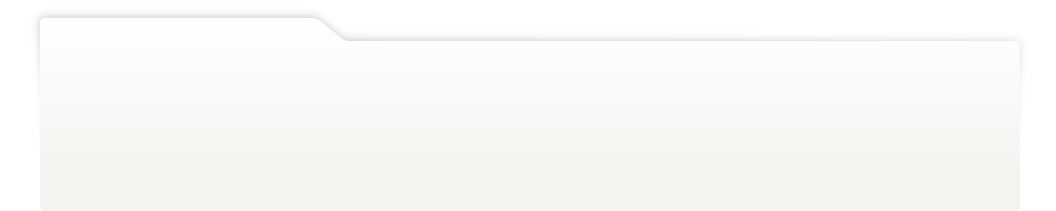
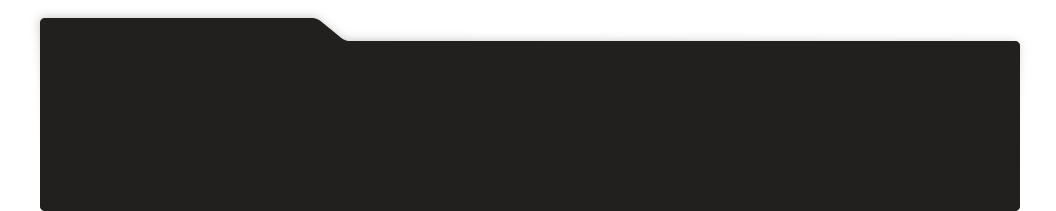
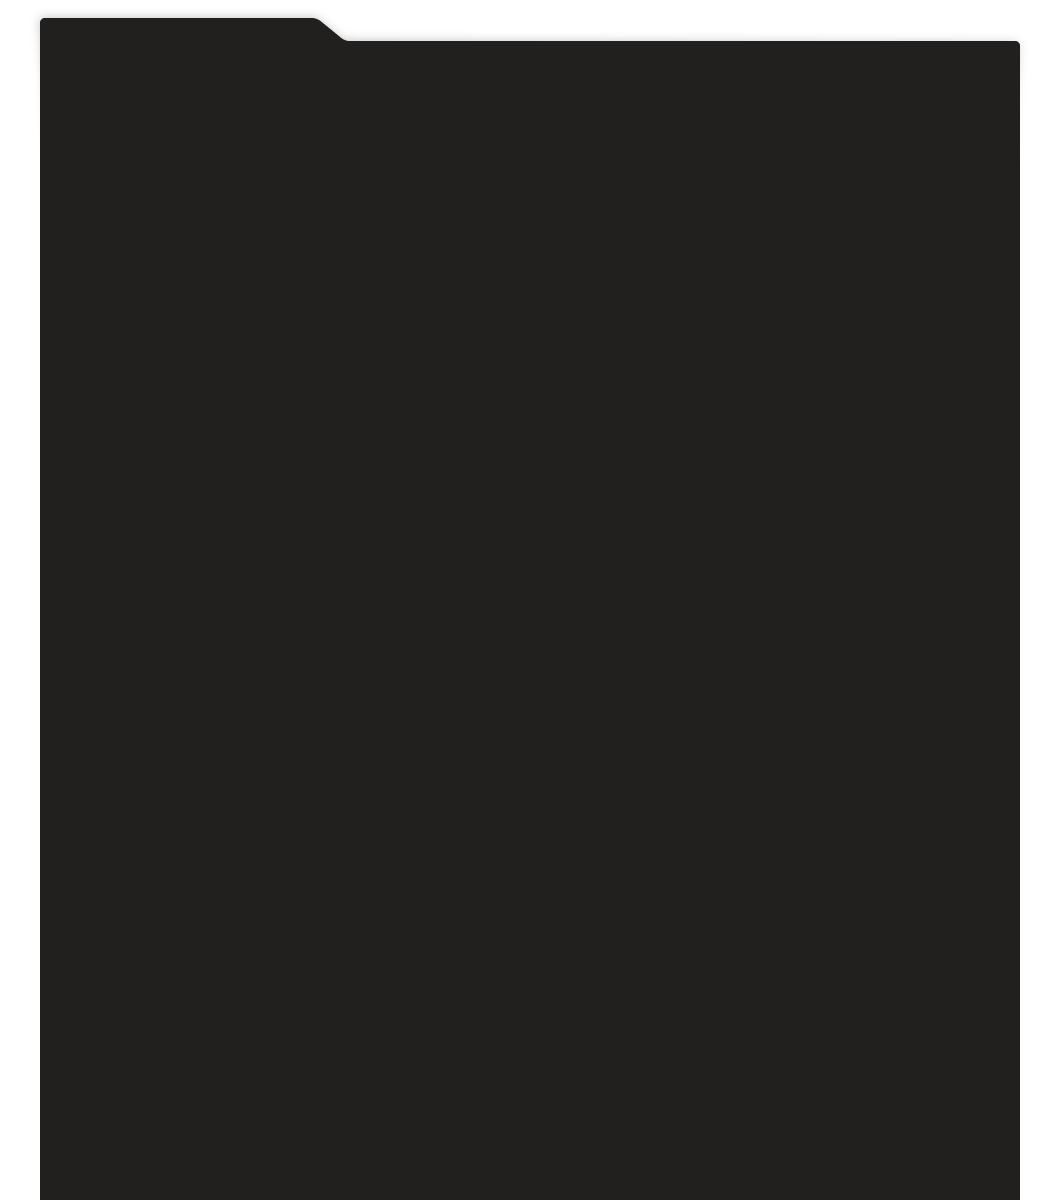
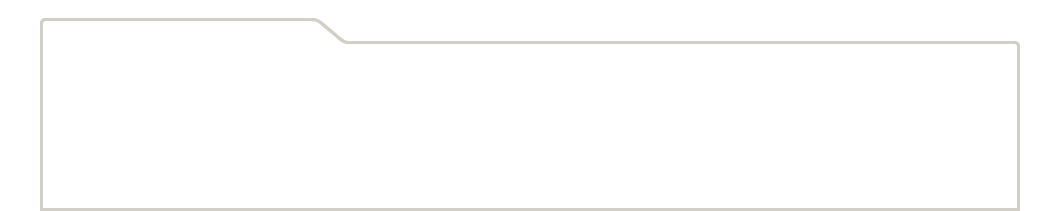
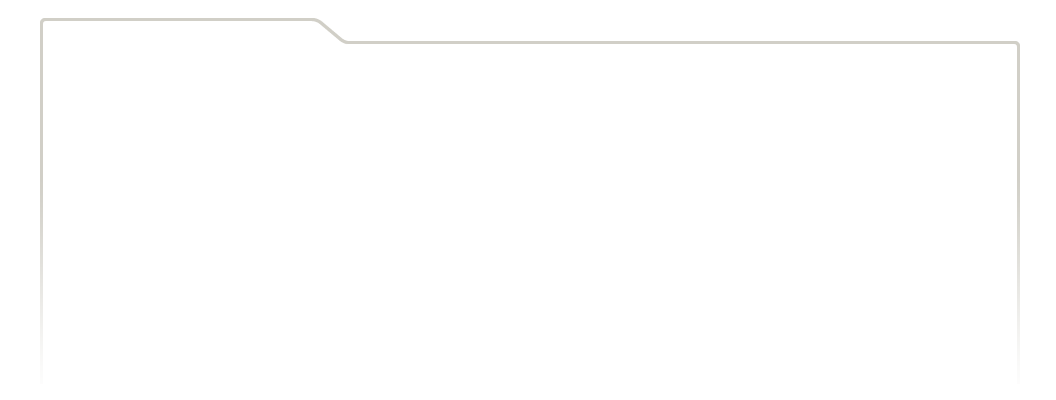
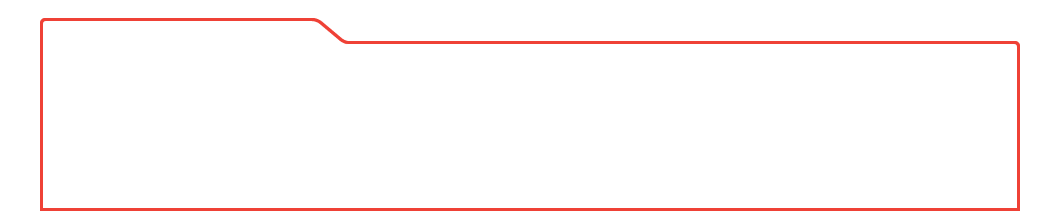
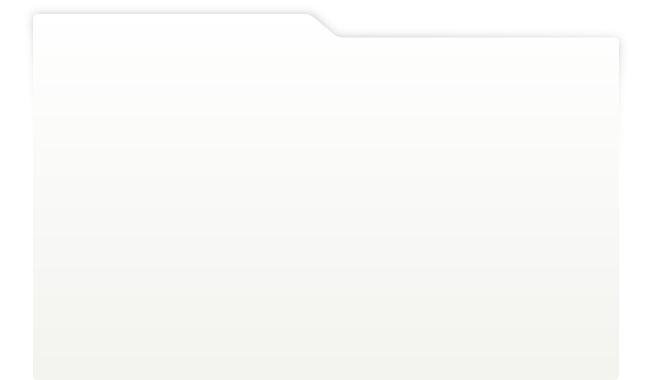
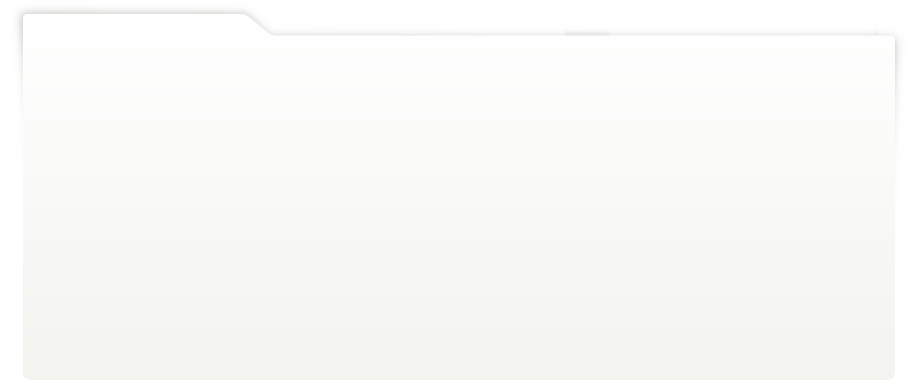
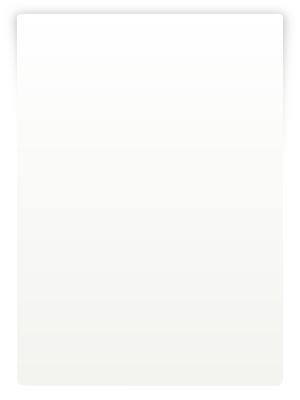
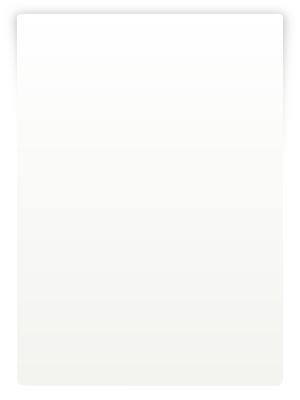
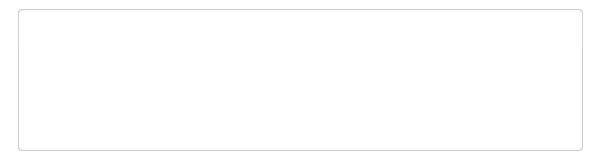
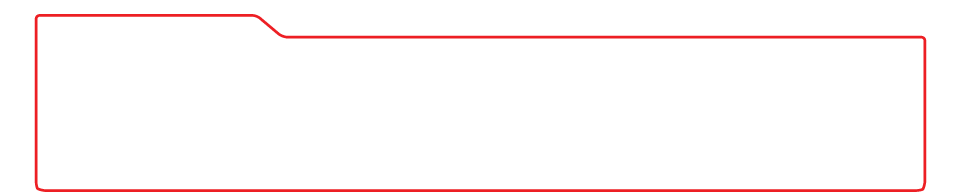
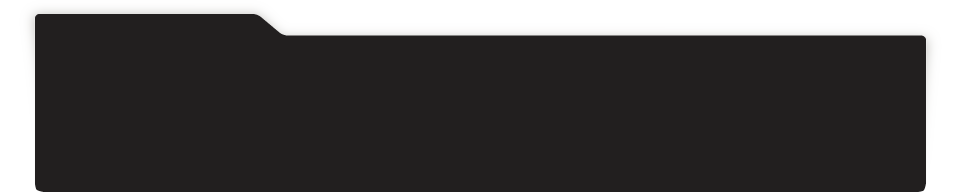
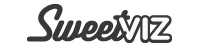
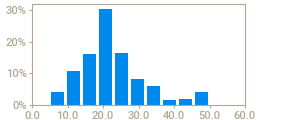
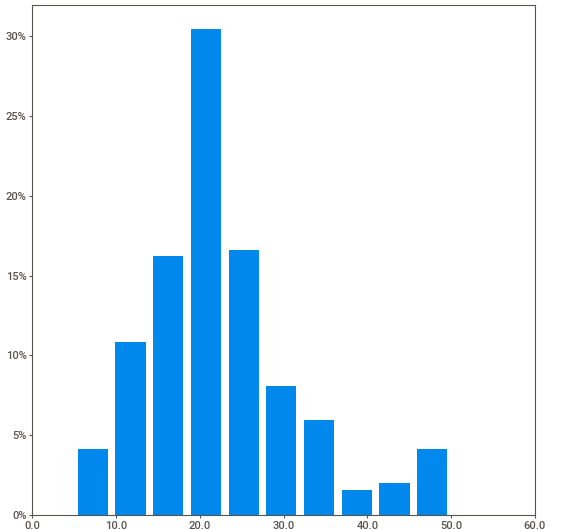
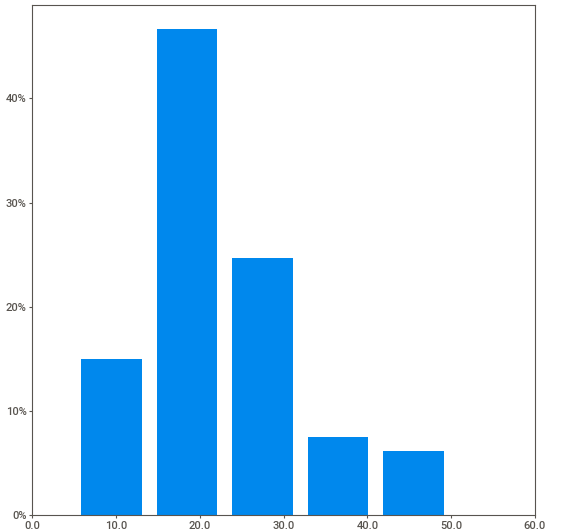
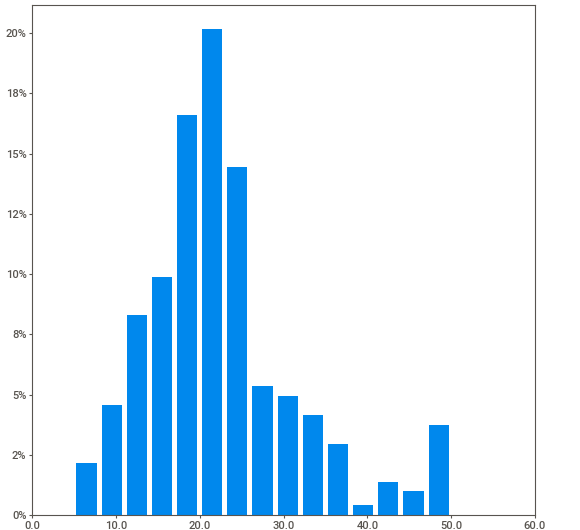
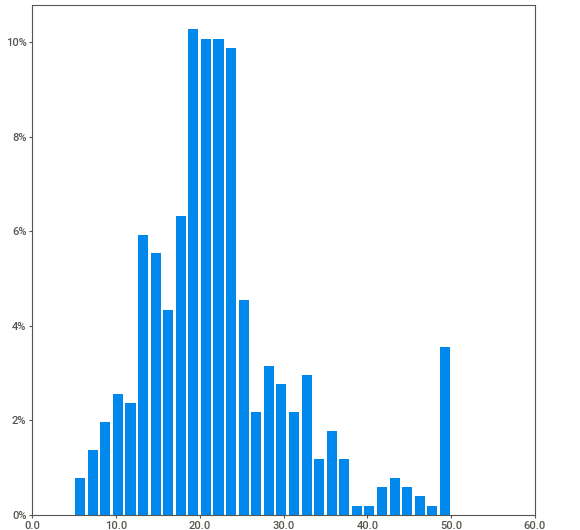
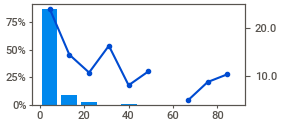
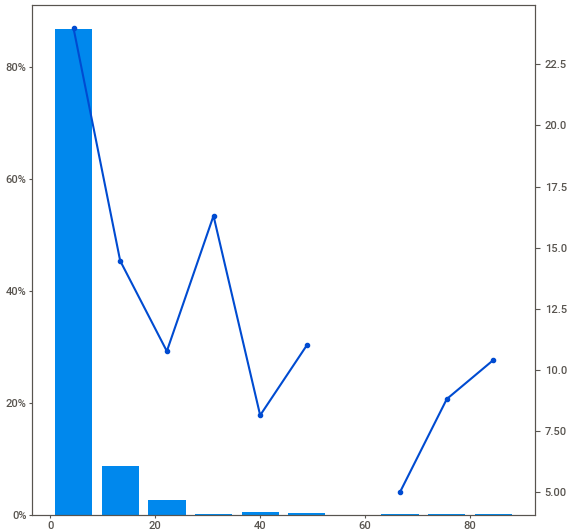
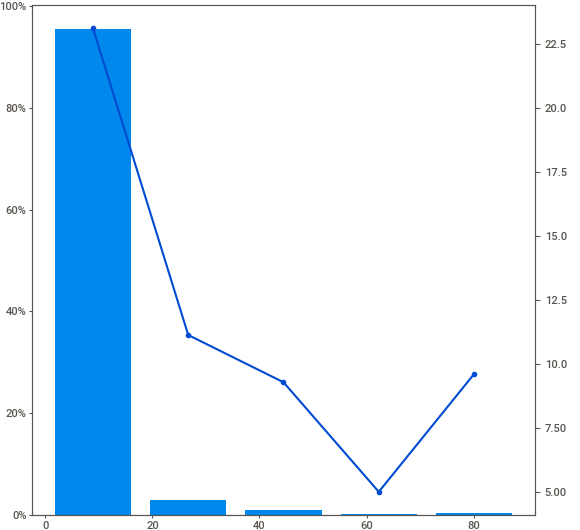
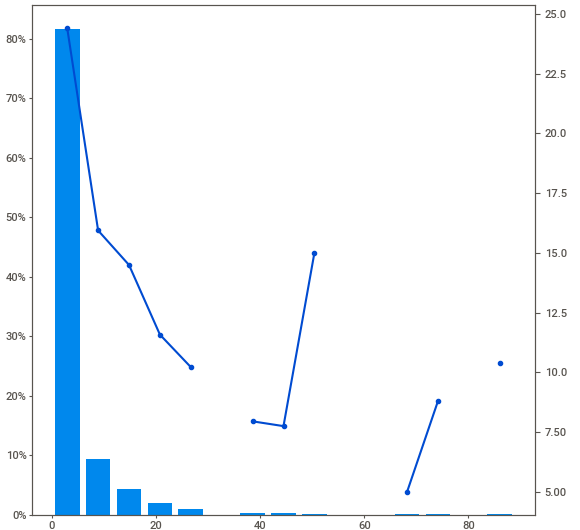
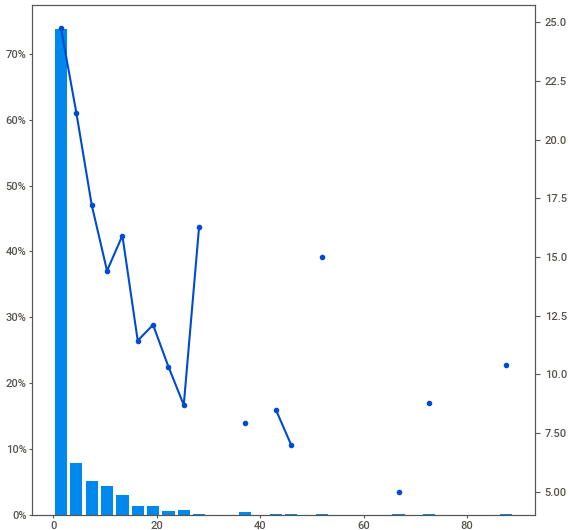
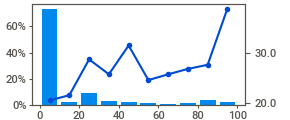
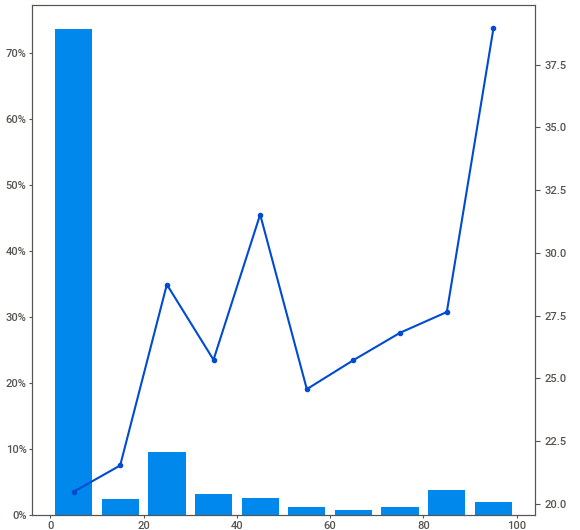
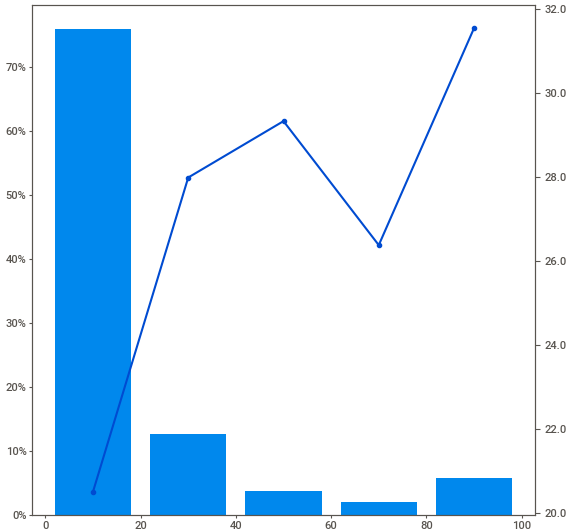
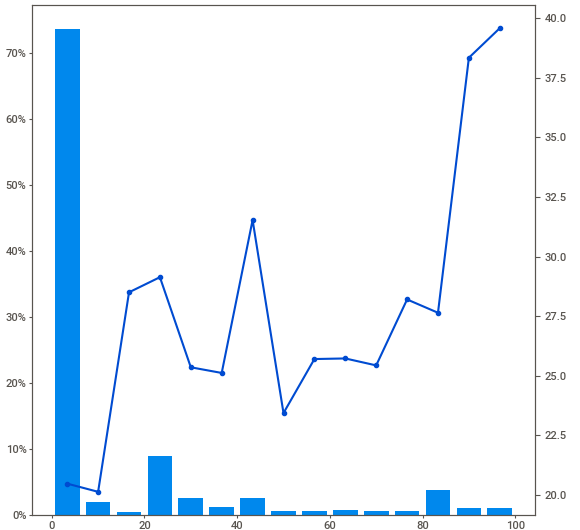
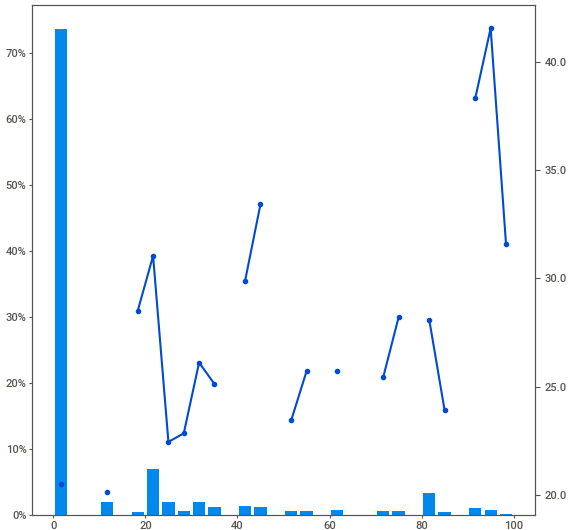
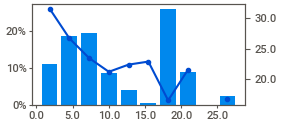
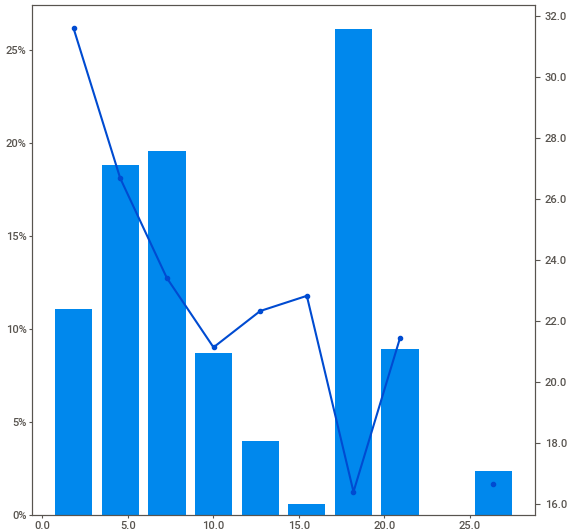
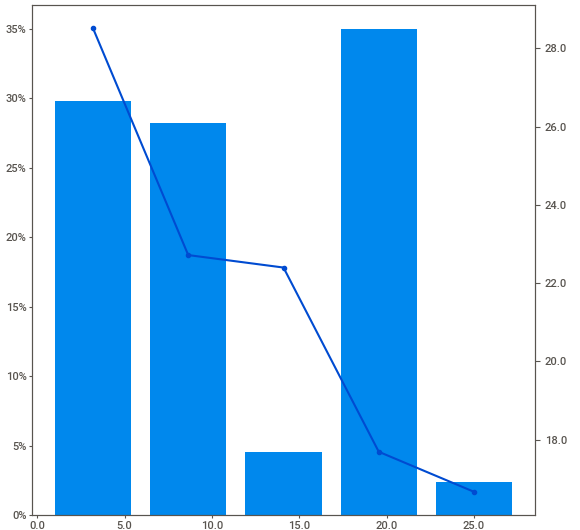
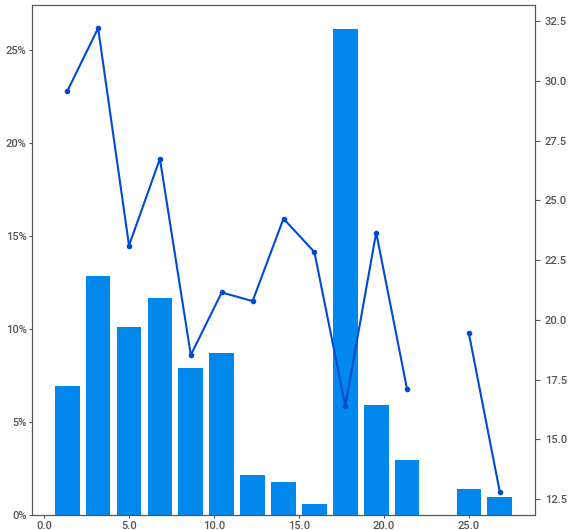
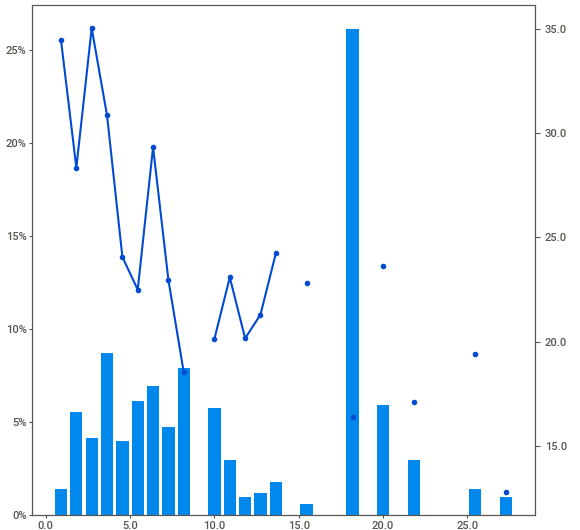
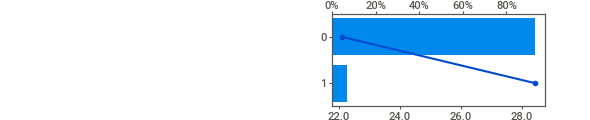
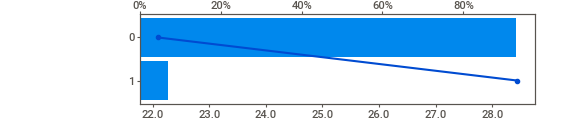
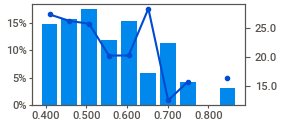
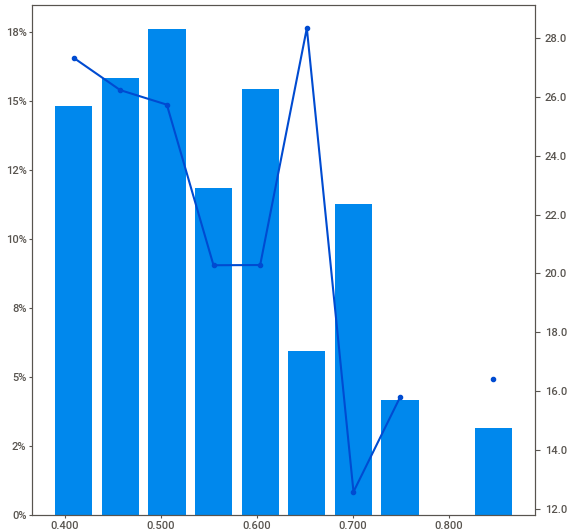
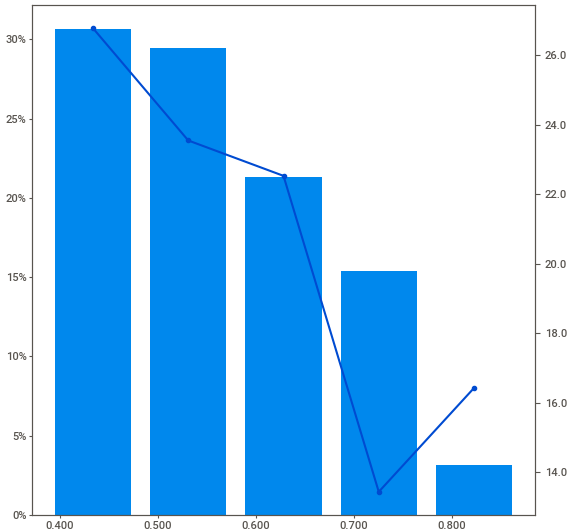
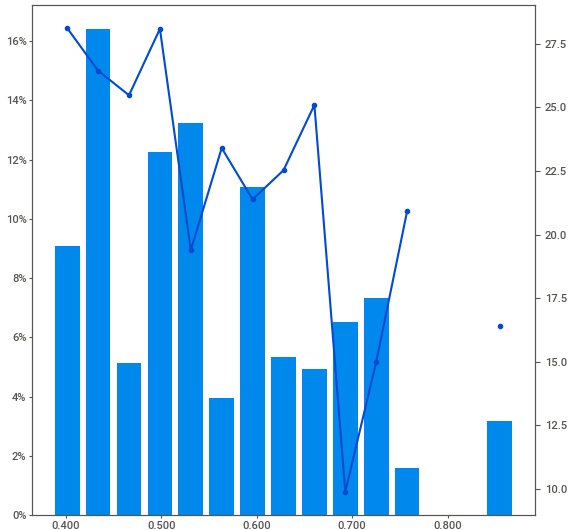
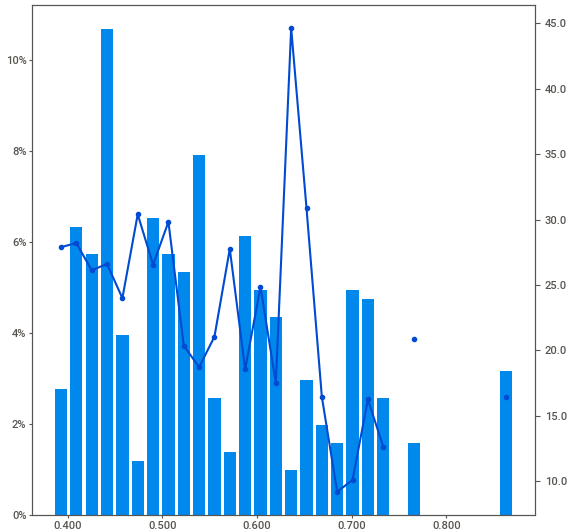
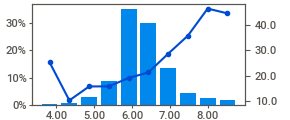
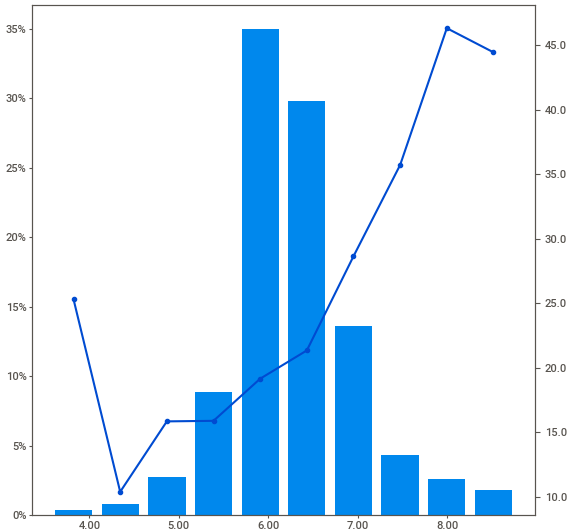
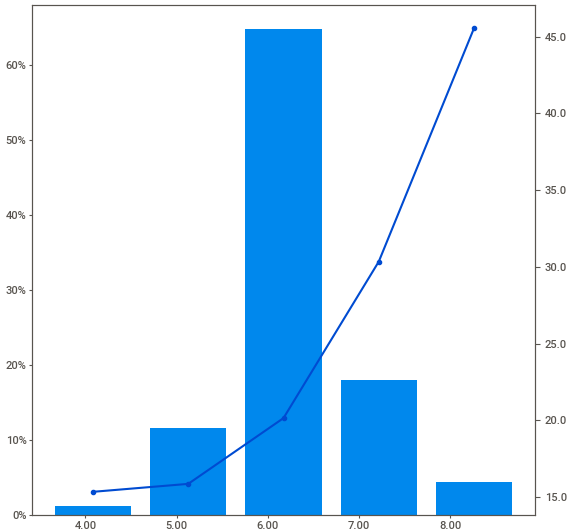
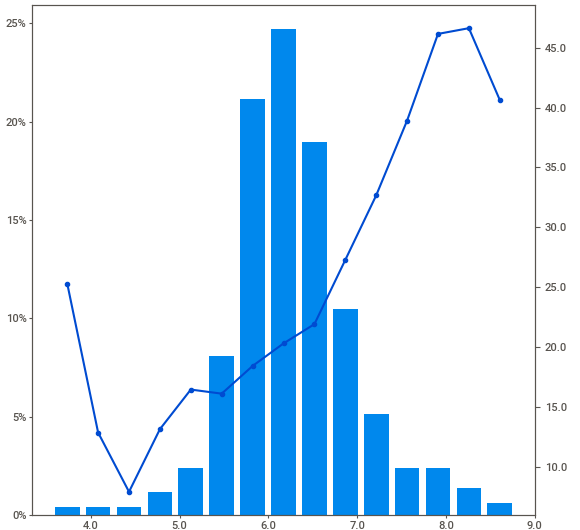
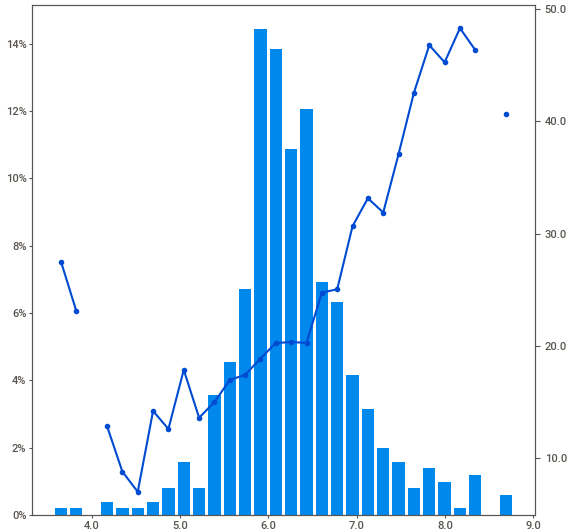
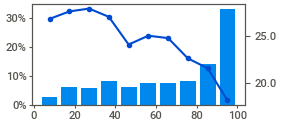
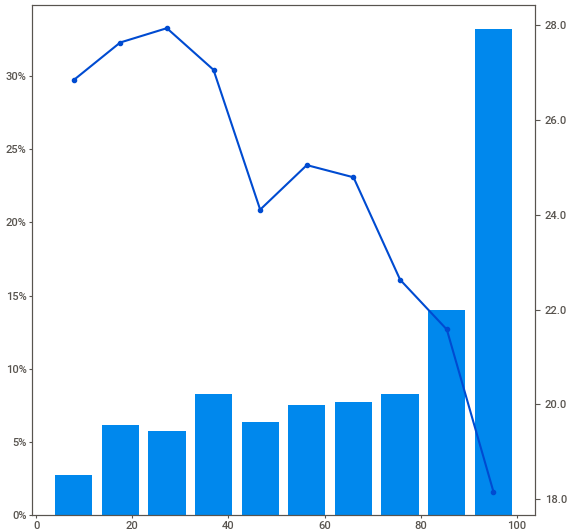
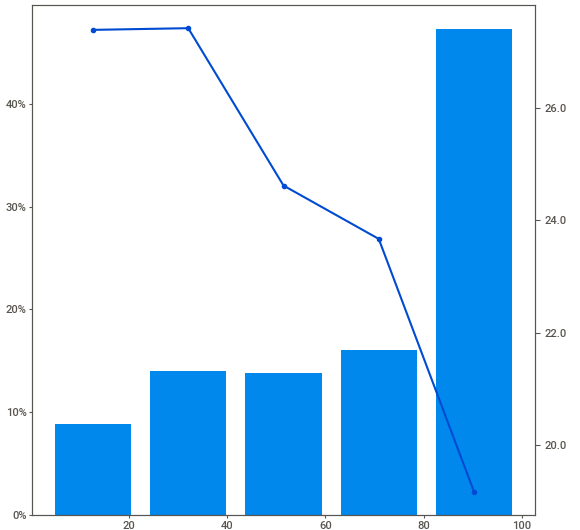
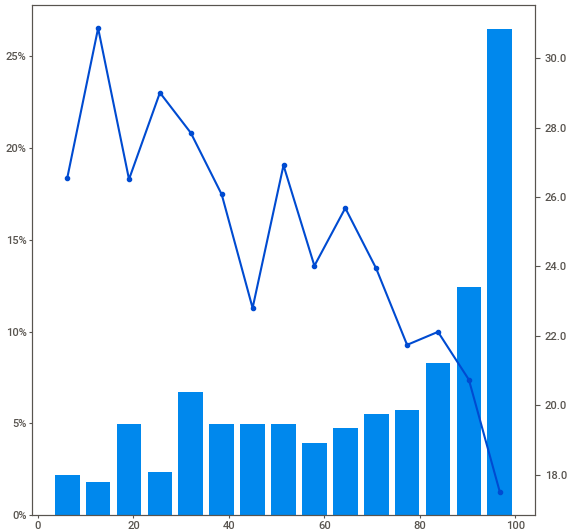
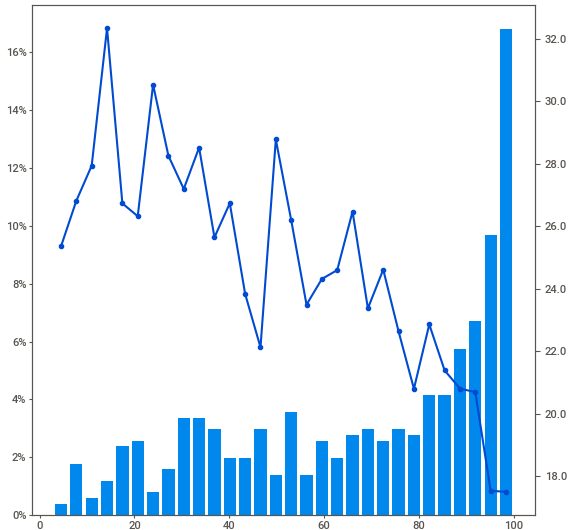
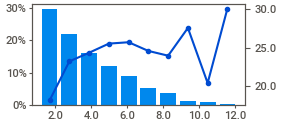
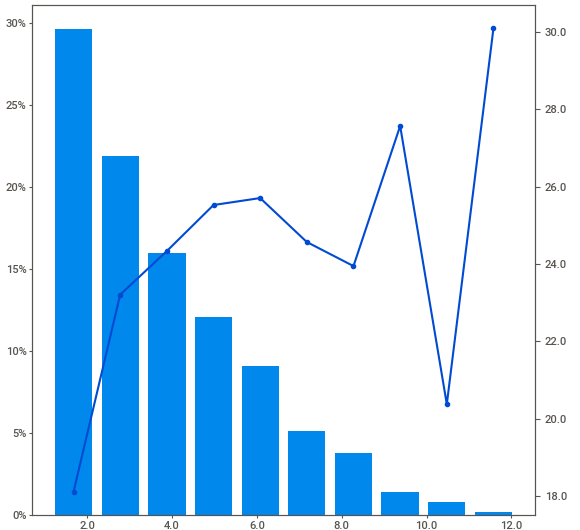
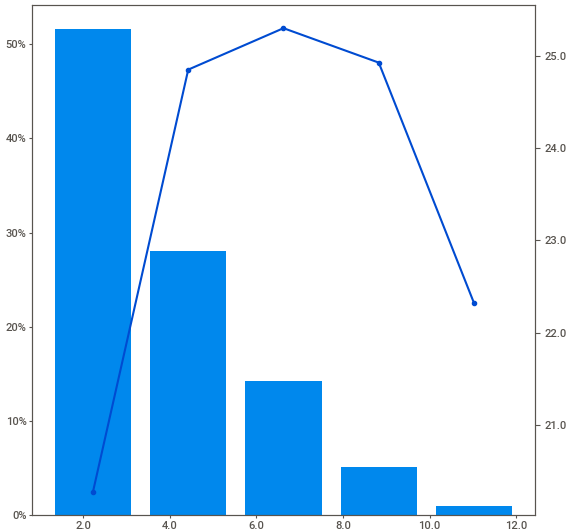
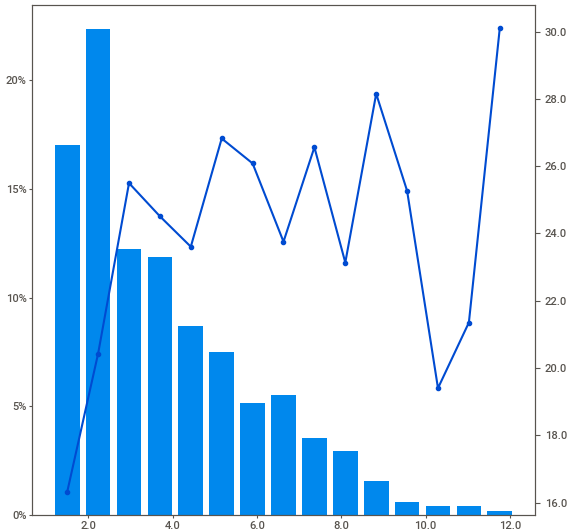
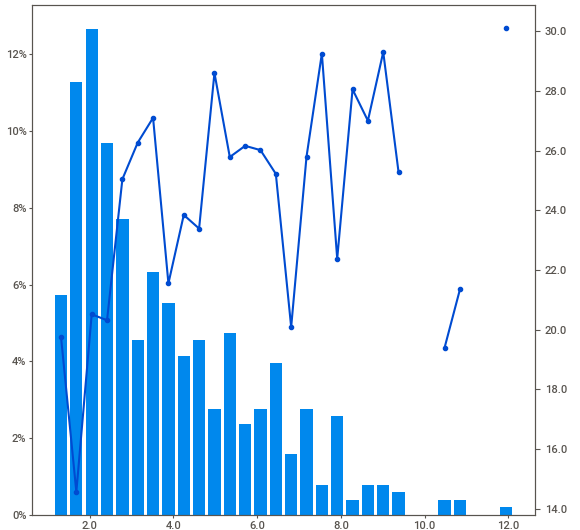
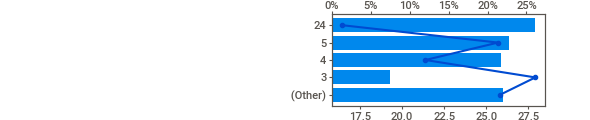
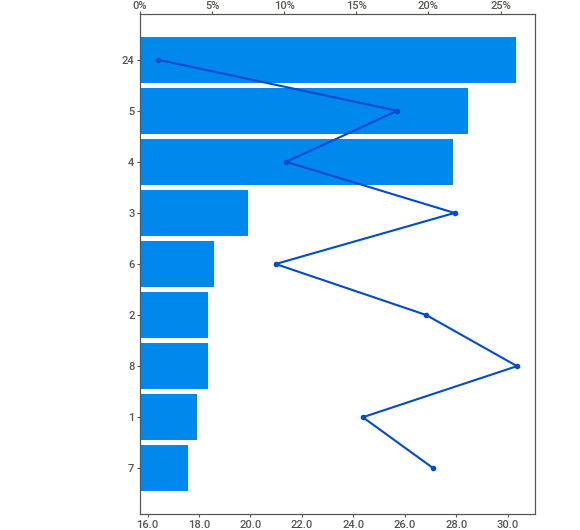
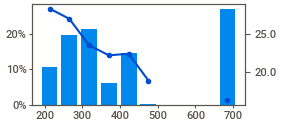
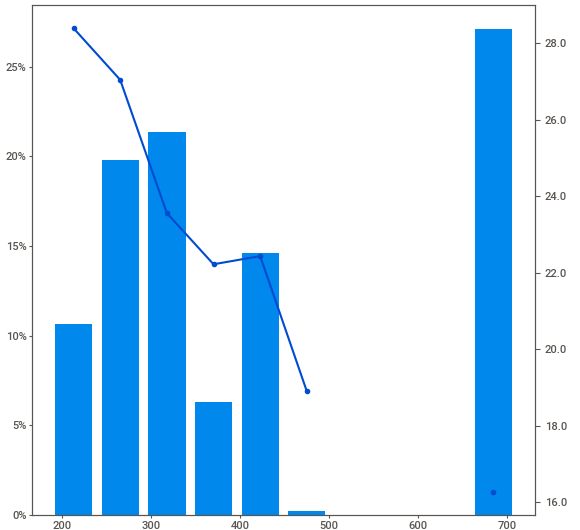
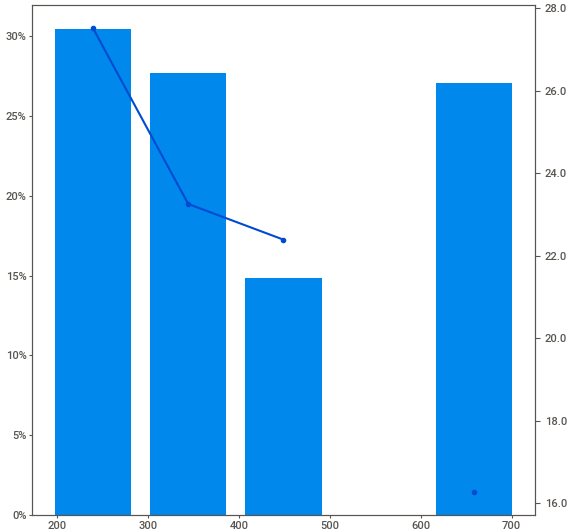
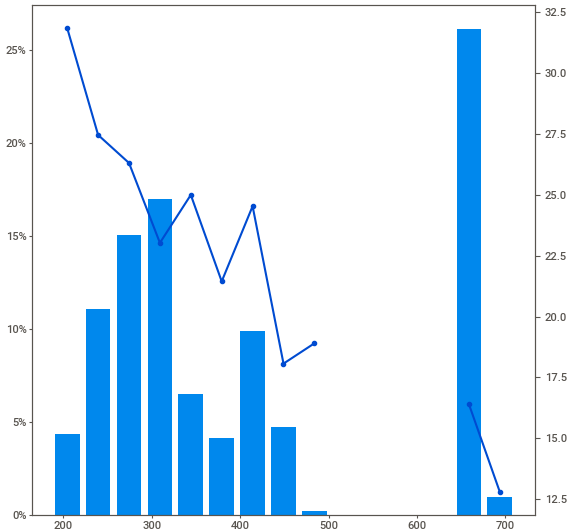
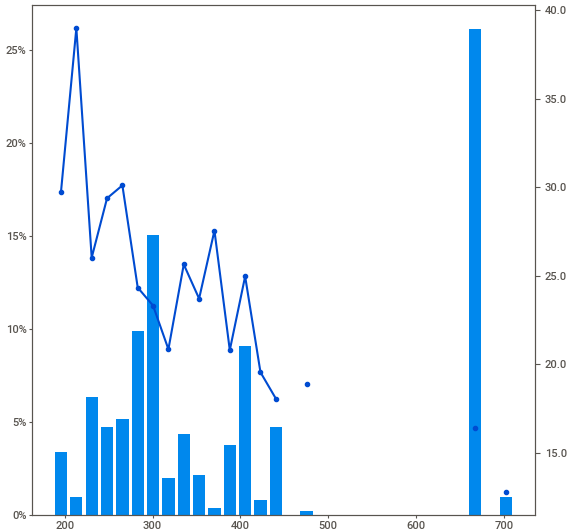
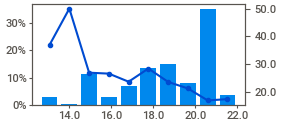
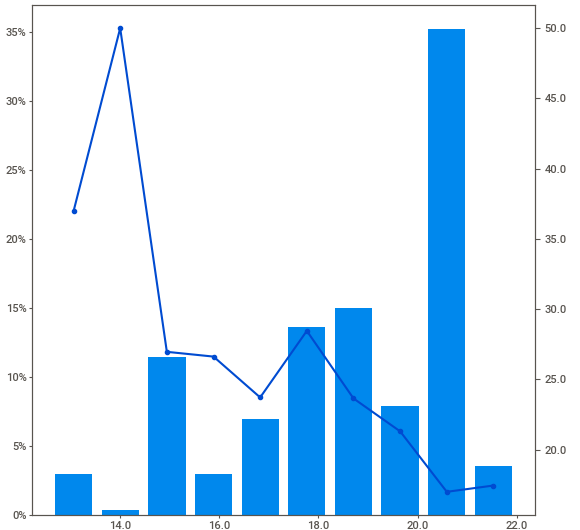
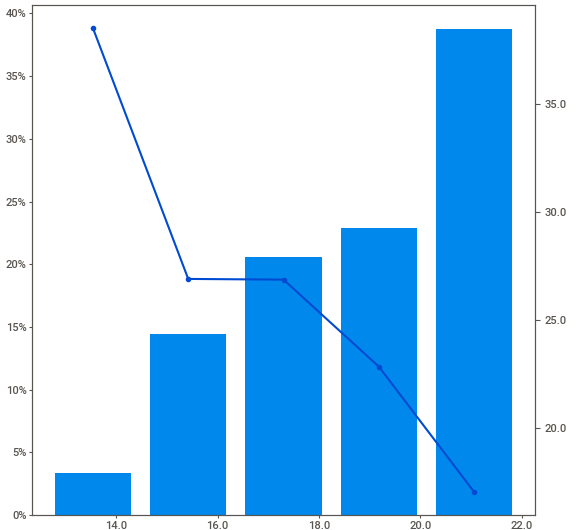
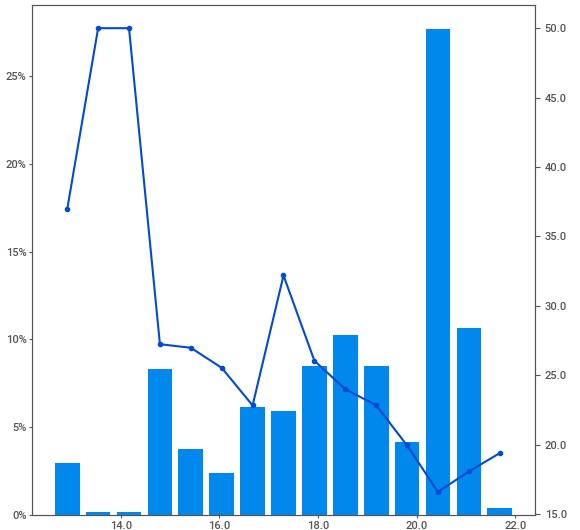
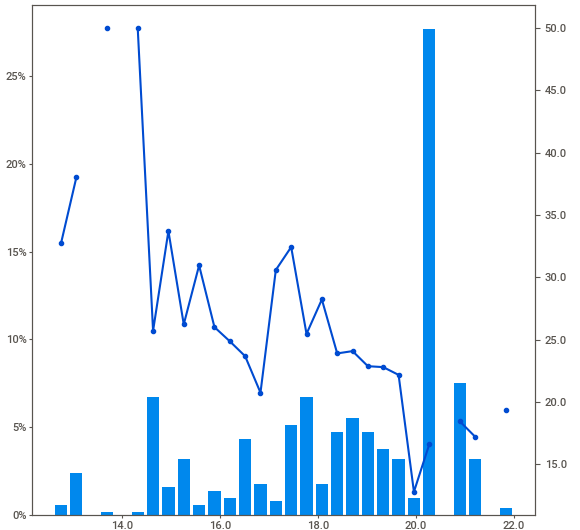
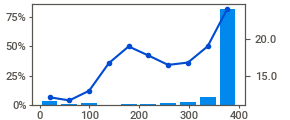
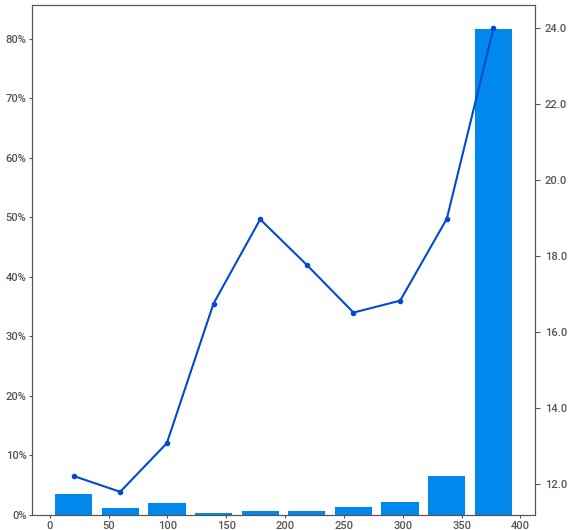
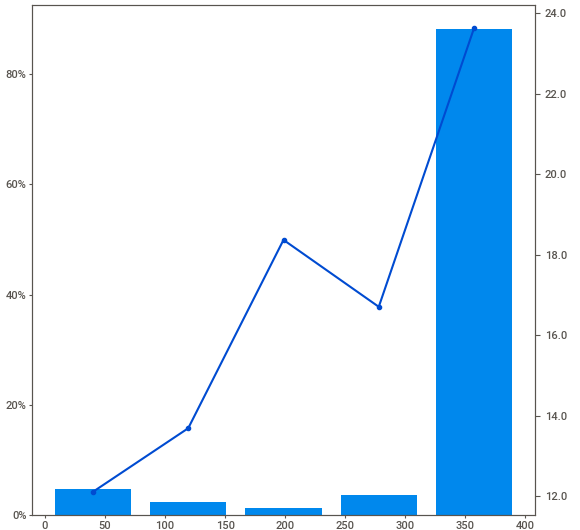
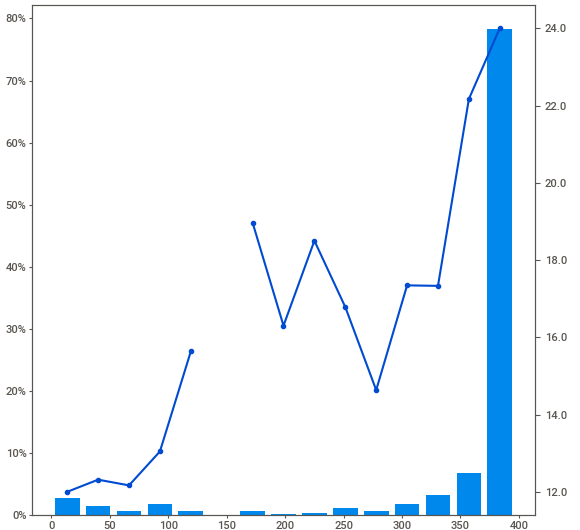
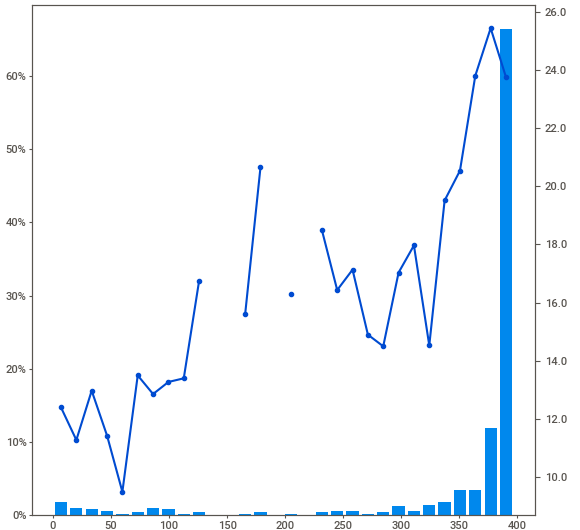
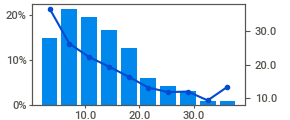
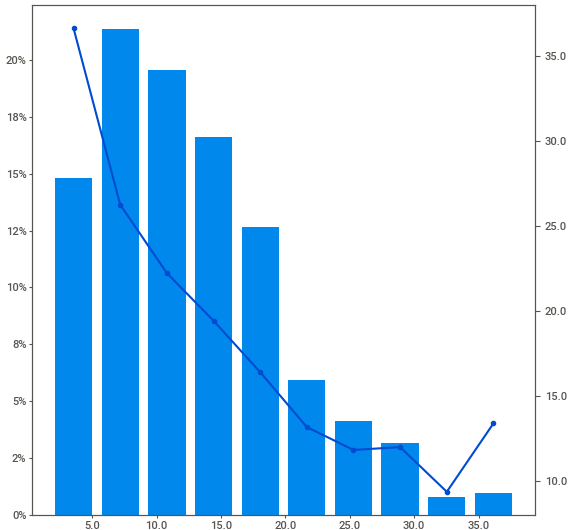
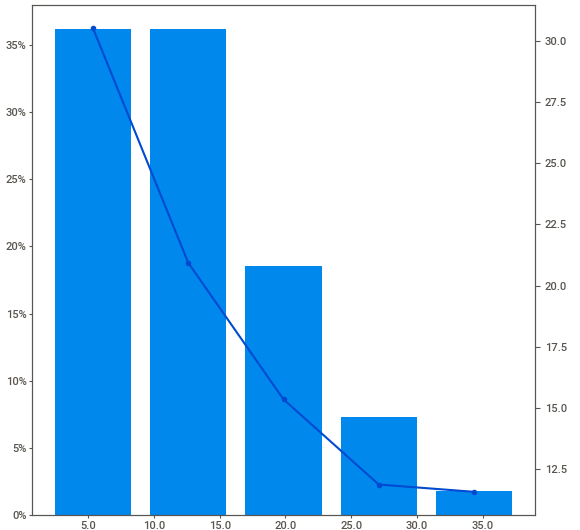
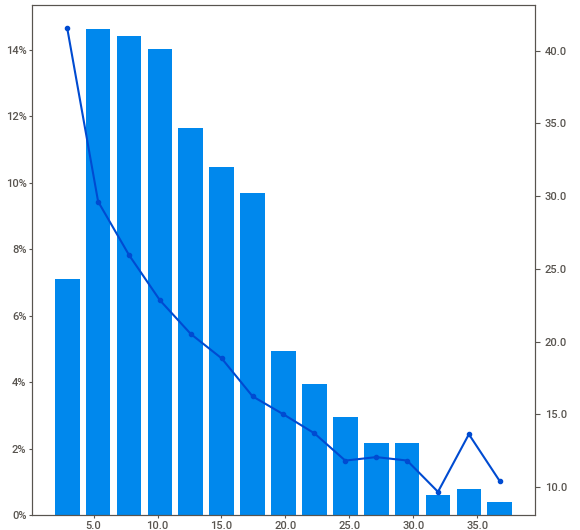
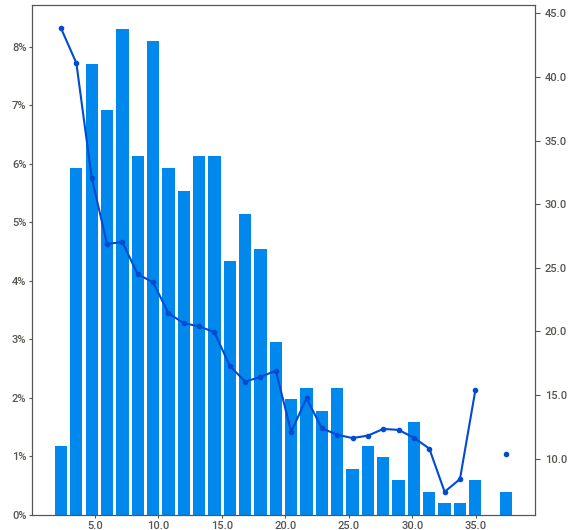
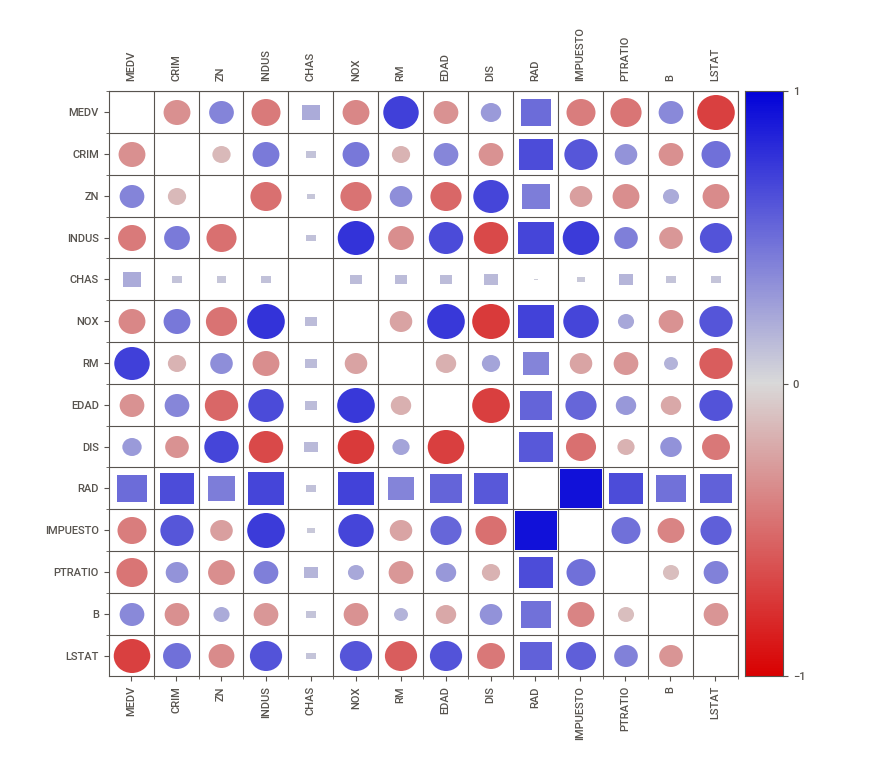
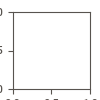

In [12]:
dash=sw.analyze(df,'MEDV')
dash.show_notebook()

In [14]:
corr_matrix = df.corr()

# Select the most significant variables based on their correlation with MEDV
significant_variables = corr_matrix['MEDV'].sort_values(ascending=False)[1:6].index.tolist()

print("Most significant variables:", significant_variables)


Most significant variables: ['RM', 'ZN', 'B', 'DIS', 'CHAS']


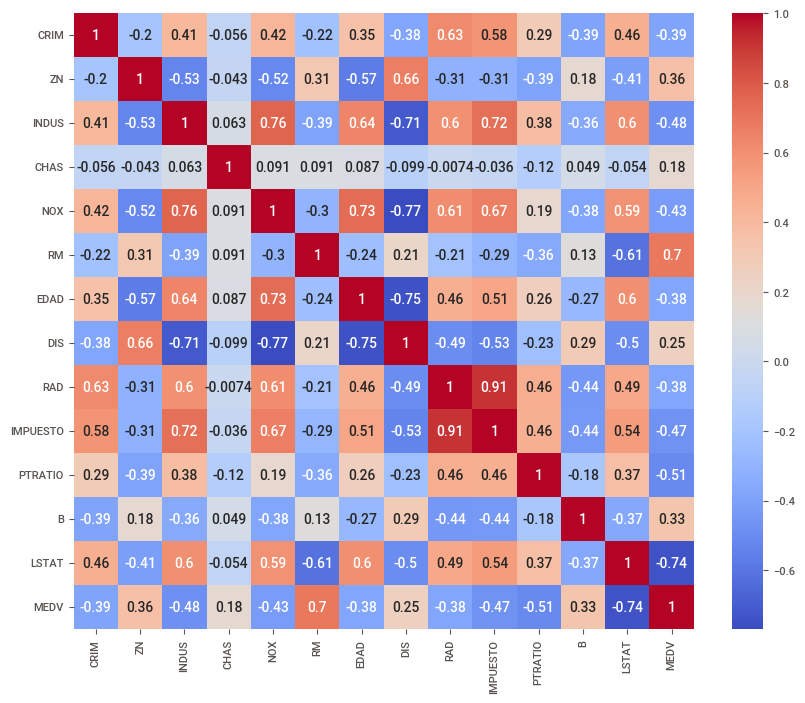

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


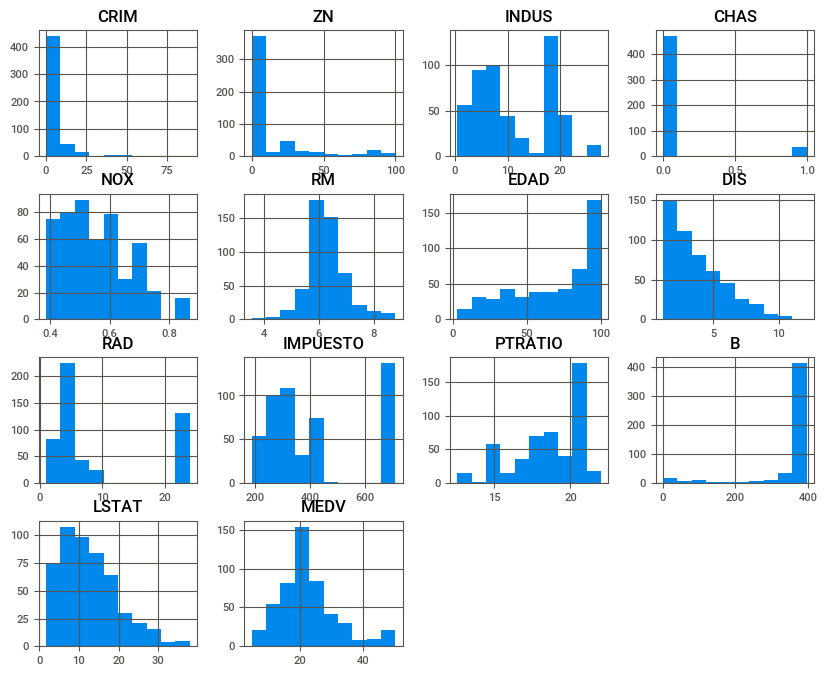

MEDV        1.000000
RM          0.695360
ZN          0.360445
B           0.333461
DIS         0.249929
CHAS        0.175260
EDAD       -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
IMPUESTO   -0.468536
INDUS      -0.483725
PTRATIO    -0.507787
LSTAT      -0.737663
Name: MEDV, dtype: float64


In [18]:
import matplotlib.pyplot as plt
# Realizar un análisis estadístico básico.
df.describe()

# Visualizar la distribución de los datos mediante histogramas.
df.hist(figsize=(10, 8), bins=10)
plt.show()

# Identificar correlaciones significativas.
corr_matrix = df.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))


In [20]:
import pandas as pd
# Manejo de valores ausentes o incorrectos
df.fillna(df.mean(), inplace=True)

# Normalización de las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['MEDV'], test_size=0.2, random_state=42)

# Entrenar varios modelos de regresión
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__}: MSE = {mse}")



LinearRegression: MSE = 1.5043500123260262e-27
DecisionTreeRegressor: MSE = 0.0590196078431372
RandomForestRegressor: MSE = 0.020618735294117466


In [27]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame original que contiene las características y la variable objetivo

# Creamos la nueva característica multiplicando ZN por RM
df['ZN_RM_interaction'] = df['ZN'] * df['RM']

# Veamos la nueva correlación con la variable objetivo (MEDV)
correlation_with_MEDV = df.corr()['MEDV']

print(correlation_with_MEDV)



CRIM                -0.388305
ZN                   0.360445
INDUS               -0.483725
CHAS                 0.175260
NOX                 -0.427321
RM                   0.695360
EDAD                -0.376955
DIS                  0.249929
RAD                 -0.381626
IMPUESTO            -0.468536
PTRATIO             -0.507787
B                    0.333461
LSTAT               -0.737663
MEDV                 1.000000
ZN_RM_interaction    0.392613
Name: MEDV, dtype: float64


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'EDAD', 'DIS', 'RAD', 'IMPUESTO', 'PTRATIO', 'B', 'LSTAT', 'ZN_RM_interaction']], df['MEDV'], test_size=0.2, random_state=42)

# Inicializar los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Predecir los precios de las viviendas en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el error cuadrático medio (MSE) del modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE del modelo {name}: {mse}")



MSE del modelo Linear Regression: 21.677459613775714
MSE del modelo Decision Tree Regressor: 10.965686274509807
MSE del modelo Random Forest Regressor: 7.99653299019608


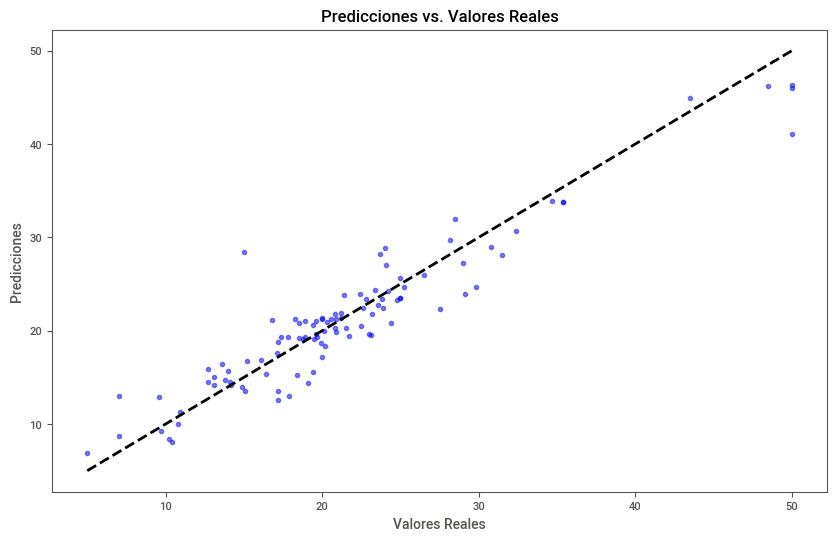

In [31]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()